In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df = pd.read_csv(r"C:\Users\HP\ml_training\linear_regression_dataset.csv")
df = df[(df.TOTCHG < 20000) & (df.TOTCHG > 1000)  & (df.RACE < 3)]
x = df[['AGE','FEMALE','LOS','APRDRG']].values
y = df['TOTCHG'].values


x = sc.fit_transform(x)
x1 = x[350:]
x  = x[:351]
y1 = y[350:]
y = y[:351]

def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z-y
        
        weight_gradient = loss.dot(x) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost

        
    return w, b, cost_list
w, b, c= GradientDescent(x, y, np.zeros(x.shape[1]), 0, 0.001,epochs= 15000)
def predict(X, w, b):
    return X.dot(w) + b

y_pred = predict(x1, w, b)



0.8170791091677791


In [177]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
print(r2score(y_pred, y1))

0.8170791091677791


In [173]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y_pred,y1))**0.5

924.6911519870779

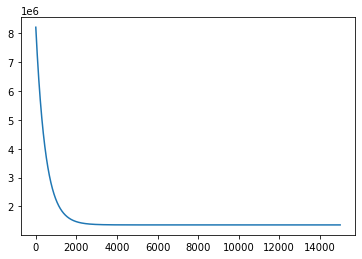

In [174]:
plt.plot(c)
